<a href="https://colab.research.google.com/github/RubyNixx/CIFAR10/blob/main/CIFAR10_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10 Dataset Analysis and Modeling

This project aims to implement and evaluate various machine learning models for image classification using the CIFAR-10 dataset. The CIFAR-10 dataset, developed by researchers at the Canadian Institute For Advanced Research, is a widely used benchmark in computer vision and machine learning research13.

The CIFAR-10 dataset consists of 60,000 32x32 color images divided into 10 distinct classes, with 6,000 images per class. These classes include airplanes, automobiles, birds, cats, deer, dogs, frogs, horses, ships, and trucks13. The dataset is split into 50,000 training images and 10,000 test images, providing a balanced set for model training and evaluation3.

This project will explore various aspects of machine learning, including:

- Exploratory Data Analysis and preprocessing

- Dimensionality reduction and clustering

- Implementation of multiple classification models

- Neural network architectures, including shallow networks and CNNs

- Hyperparameter optimisation

By working with CIFAR-10, we aim to gain insights into the challenges and techniques involved in image classification tasks, while comparing the performance of different machine learning approaches on a standardised dataset.

## Setup

Before starting, it's essential to import the necessary libraries. Libraries are collections of pre-written code that provide functions and tools to make tasks easier and more efficient.

In [1]:
# ================================
# Basic Data Manipulation and Analysis
# ================================
import numpy as np      # Efficient numerical operations and array handling
import pandas as pd     # Data manipulation and analysis for tabular data

# ================================
# Data Visualization
# ================================
import matplotlib.pyplot as plt   # Creating static and interactive plots
import seaborn as sns            # Statistical data visualization built on matplotlib

# ================================
# Machine Learning Tools
# ================================
from sklearn.model_selection import train_test_split # Splitting data into train/test sets
from sklearn.preprocessing import StandardScaler     # Feature scaling
from sklearn.decomposition import PCA                # Dimensionality reduction
from sklearn.cluster import KMeans                   # Clustering algorithm
from sklearn.tree import DecisionTreeClassifier      # Decision tree classifier
from sklearn.ensemble import RandomForestClassifier  # Random forest classifier
from sklearn.svm import SVC                          # Support Vector Machine classifier
from sklearn.neighbors import KNeighborsClassifier   # K-Nearest Neighbors classifier
from sklearn.manifold import TSNE                    # Nonlinear dimensionality reduction for visualisation
from sklearn.metrics import (                        # Model evaluation metrics
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, RocCurveDisplay, silhouette_score, pairwise_distances
)
from sklearn.metrics.pairwise import euclidean_distances    # Distance calculations
from sklearn.preprocessing import label_binarize # Converts labels into binary

# ================================
# Deep Learning Framework
# ================================
import tensorflow as tf                          # Main deep learning framework
from tensorflow import keras                     # High-level API for building models
from tensorflow.keras.models import Sequential   # Sequential model architecture
from tensorflow.keras.layers import (            # Common neural network layers
    Dense, Flatten, Conv2D, MaxPooling2D, Dropout,
    BatchNormalization, Input
)
from tensorflow.keras.optimizers import Adam     # Optimizer for training models
from tensorflow.keras.utils import to_categorical # Utility for one-hot encoding labels
from tensorflow.keras.applications import VGG16   # Pretrained VGG16 model for transfer learning
from tensorflow.keras.applications.vgg16 import preprocess_input  # Preprocessing for VGG16
from tensorflow.keras.datasets import cifar10     # CIFAR-10 image dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation
!pip install keras-tuner --quiet
import keras_tuner as kt # Hyperparameter tuning for Keras models
import cv2 # Computer vision library used for manual tuning edge detection, and feature extraction

# ================================
# Feature Extraction (Image Processing)
# ================================
from skimage.feature import local_binary_pattern, hog      # Image feature extraction (LBP, HOG)

# ================================
# System and Environment Management
# ================================
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow info/debug logs for cleaner output

# ================================
# (Optional) Package Installation
# ================================
# !pip install --upgrade tensorflow
# !pip install keras-tuner --quiet


# A) Exploratory Data Analysis and Preprocessing

Exploratory Data Analysis (EDA) is the process of investigating the dataset to understand its main characteristics before applying any machine learning algorithms.

### 1. Dataset Overview

The CIFAR-10 data is loaded into training and testing sets. This is a fundamental practice in machine learning. The training set is used to teach the model to recognise patterns, while the testing set is used to evaluate how well the model generalises to new, unseen data. This helps prevent overfitting (when a model memorises the training data but fails on new data) and provides a realistic estimate of model performance in real-world scenarios. (Geron, 2019; Brownlee, 2020; Goodfellow et al, 2016)

*   X_train: The training images (input data) used to train the model.

*   y_train: The labels (target outputs) for the training images.

*   X_test: The test images, which the model has never seen during training.

*   y_test: The labels for the test images, used to evaluate the model's performance.

In [2]:
# Load CIFAR-10 dataset, splitting into training and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### 2. Examine Dataset
By checking the shape and data types of X_train, y_train, X_test, and y_test, we confirm how many samples we have, their dimensions, and how the data is organised (Brownlee, 2020).

In [3]:
# Analyse dataset shape and structure
# Ensuring correct data types and value ranges is crucial for normalisation and model compatibility

# Each image is 32x32 pixels with 3 color channels (RGB)
print(f"Training set shape: {X_train.shape}")  # (50000, 32, 32, 3)
print(f"Test set shape: {X_test.shape}")      # (10000, 32, 32, 3)

# Labels are stored as arrays of integers representing class indices
print(f"Training labels shape: {y_train.shape}")  # (50000, 1)
print(f"Test labels shape: {y_test.shape}")      # (10000, 1)


# Check data types and pixel value ranges to inform preprocessing steps
print(f"Data type of X_train: {X_train.dtype}")
print(f"Minimum pixel value: {X_train.min()}, Maximum pixel value: {X_train.max()}")

# Examine data types of images and labels
print(f"Image data type: {X_train.dtype}")
print(f"Label data type: {y_train.dtype}")

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Training labels shape: (50000, 1)
Test labels shape: (10000, 1)
Data type of X_train: uint8
Minimum pixel value: 0, Maximum pixel value: 255
Image data type: uint8
Label data type: uint8


Knowing how many classes exist and their names helps us understand the classification problem and guides our model selection and evaluation.

In [4]:
# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Print the class names
print("CIFAR-10 class names:")
for i, name in enumerate(class_names):
    print(f"{i}: {name}")


CIFAR-10 class names:
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck


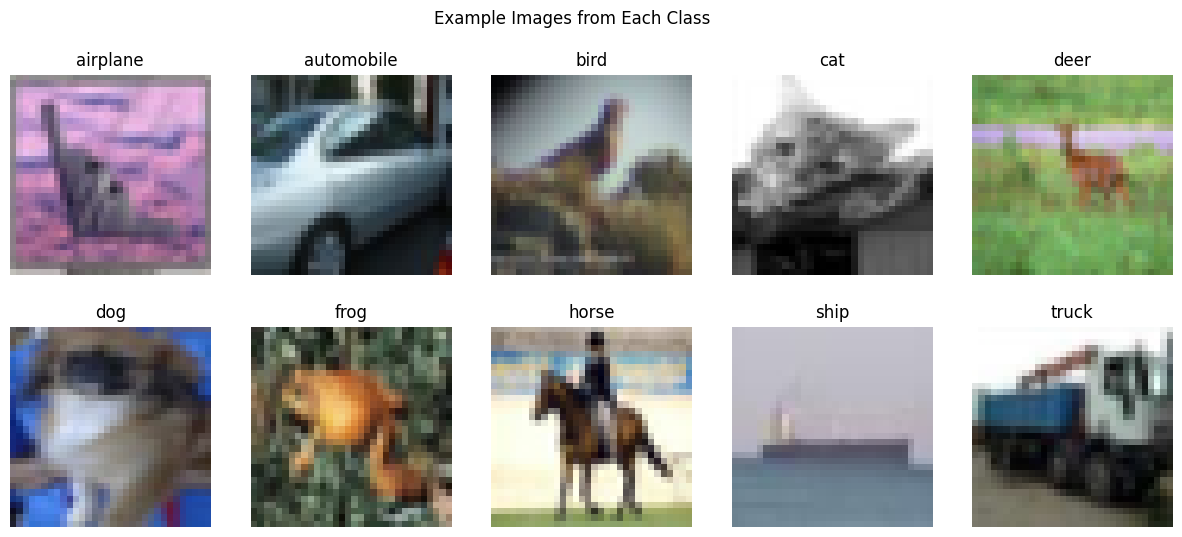

In [5]:
# Visualising helps assess dataset diversity and intra-class variation, which is important for model selection and evaluation.

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, class_name in enumerate(class_names):
    idx = np.where(y_train.flatten() == i)[0]
    img = X_train[idx[np.random.randint(len(idx))]]
    ax = axes[i // 5, i % 5]
    # If images are not yet normalized, they may be uint8; if already normalised, multiply by 255 for display
    if img.max() <= 1.0:
        ax.imshow((img * 255).astype(np.uint8))
    else:
        ax.imshow(img.astype(np.uint8))
    ax.set_title(class_name)
    ax.axis('off')
plt.suptitle("Example Images from Each Class")
plt.show()


The plot above shows a random sample from each CIFAR-10 class. This helps illustrate the diversity and complexity of the dataset, providing insight into intra-class variation and the challenge of visual classification (Krizhevsky, 2009; Goodfellow et al., 2016).


By visualising the number of samples per class, we can detect if the dataset is balanced or imbalanced. Imbalanced datasets may require special handling to avoid biased models.

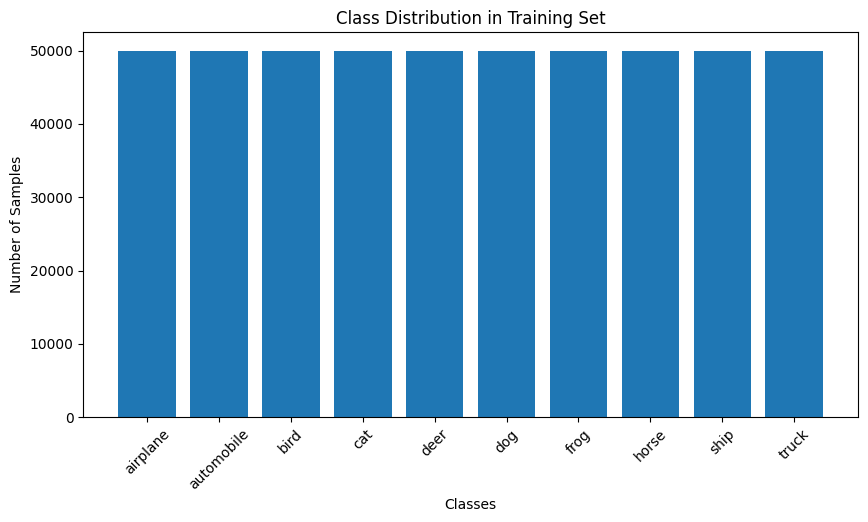

In [6]:
# Get the class with the highest probability for each sample

y_train_classes = np.argmax(y_train, axis=1)

# Visualise class distribution to help detect class imbalance, which can affect model performance. Balanced class distribution ensures that the model does not become biased towards any class.

unique, counts = np.unique(y_train_classes, return_counts=True)

plt.figure(figsize=(10, 5))
plt.bar(class_names, counts)
plt.title('Class Distribution in Training Set')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

The classes in CIFAR-10 are well-balanced, with approximately 5,000 images per class, which is ideal for training classification models (Krizhevsky, 2009).


Looking at image sizes, pixel value ranges, and normalisation status ensures that the data is ready for modeling (e.g., many models expect pixel values to be between 0 and 1).

In [7]:
# Examine image properties to ensure all images are the expected size and pixel values are within the expected range.

print(f"Image size: {X_train[0].shape}")
print(f"Pixel value range: {X_train.min()} to {X_train.max()}")

Image size: (32, 32, 3)
Pixel value range: 0 to 255


### 3. Normalise the data

Normalising data adjusts all the values in the CIFAR-10 dataset so they fit within a standard range. For images, this involves changing the pixel values, which usually go from 0 to 255, so they all fall between 0 and 1. This makes it easier for models to process and compare the data, because every image is on the same scale (Miah et al., 2022).

One-hot encoding the labels with 'to_categorical' transforms the categorical class indices into binary vectors, ensuring that each class is treated independently and preventing the model from inferring any false ordinal relationships between categories. This is important for classification tasks where class labels have no inherent order (Endjin, 2025; scikit-learn, 2024).

Reshaping the images from their original 3D structure (32,32,3) to 1D vectors (3072 features) allows algorithms that expect flat feature vectors, such as many traditional machine learning models, to process the data correctly (Miah et al., 2022).

Converting the pixel values to float32 and normalising them to the range standardises the input, which improves model training stability and convergence by ensuring all features contribute equally and are on a comparable scale (Miah et al., 2022).

After normalising the pixel values to the range, the data is further standardised using StandardScaler, which shifts each feature to have zero mean and unit variance. This is especially important for traditional machine learning algorithms, as it ensures all features are treated equally and helps the model converge more quickly and reliably (scikit-learn, 2024). Applying both normalisation and standardisation is a common practice when preparing image data for non-deep-learning models.

In [8]:
# Check pixel value range before normalisation
print(f"Min pixel value: {X_train.min()}, Max pixel value: {X_train.max()}")

Min pixel value: 0, Max pixel value: 255


In [9]:
# Transform label indices to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Flatten images to 1D vectors for compatibility with traditional ML algorithms.
X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Check pixel value range after normalisation
print(f"After normalisation - Min: {X_train.min()}, Max: {X_train.max()}")

After normalisation - Min: 0.0, Max: 1.0


Pixel values are normalised to the [0, 1] range, which is standard practice to improve model convergence and stability (Goodfellow et al., 2016).

### 4. Visualization

These samples illustrate the intra-class variation (e.g., different airplane shapes) and inter-class differences (e.g., color, shape). This highlights the challenge of image classification and the need for robust models (He et al., 2016).


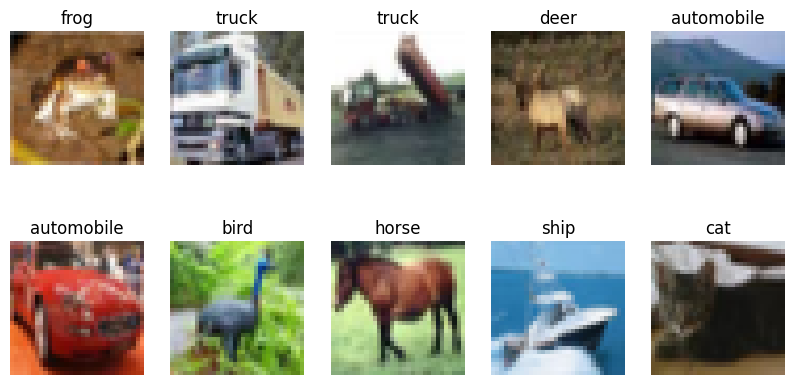

Training data shape: (50000, 3072)
Test data shape: (10000, 3072)


In [11]:
# Reshape the images back to 3D for visualisation
X_train_reshaped = X_train.reshape(-1, 32, 32, 3)

#Show sample of images for each class as visualising normalised images ensures data integrity after preprocessing.

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_reshaped[i])
    plt.title(class_names[np.argmax(y_train[i])])  # Use argmax to get the class index
    plt.axis('off')
plt.show()

# Visualising normalised images ensures data integrity after preprocessing.

#Print the shape of the training & test data to confirm that reshaping and normalisation have not altered the expected data dimensions.

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


# B) Clustering

#Dimensionality Reduction & Clustering

## 1. Apply PCA

To reduce the dimensionality of the CIFAR-10 dataset, I will first apply Principal Component Analysis (PCA) to the CIFAR-10 dataset.

PCA reduces the number of features while preserving most of the information in the dataset. This is useful for the CIFAR-10 dataset because:

- It reduces computational complexity

- It helps mitigate the "curse of dimensionality"

- It can reveal underlying structures in the data

It is commonly used to reduce the high-dimensional CIFAR-10 data (3072 features per image) to a lower-dimensional space. It also helps mitigate the "curse of dimensionality" and can reveal underlying structures in the data. (Jaadi, 2024; Kumar, 2020; Masum, 2021; Voxel52, 2023)


In [12]:
# Reshape training data from 3D (images) to 2D (samples x features) because PCA and most ML algorithms require 2D input.

# Each image becomes a row with 3072 features (32*32*3). '-1' lets numpy infer the correct number of columns.
#X_train_flat = X_train.reshape(X_train.shape[0], -1)

# Apply PCA to reduce dimensionality while retaining 95% of variance, removing noise and redundant features.
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original shape: {X_train_scaled.shape}")
print(f"Reduced shape: {X_train_pca.shape}")


Original shape: (50000, 3072)
Reduced shape: (50000, 221)


To visualise PCA, 5000 images are selected from the dataset to create a subset for processing and plotting.

The following uses PCA to shrink image details down to two summary values per image, then shows all the images as coloured dots on a simple 2D plot. It’s a way to get a “big picture” view of how the images are distributed and whether similar images group together, even if the groups aren’t always perfectly separated (Jolliffe and Cadima, 2016).

X_pca2 shape: (5000, 2)
y_vis_flat shape: (5000,)


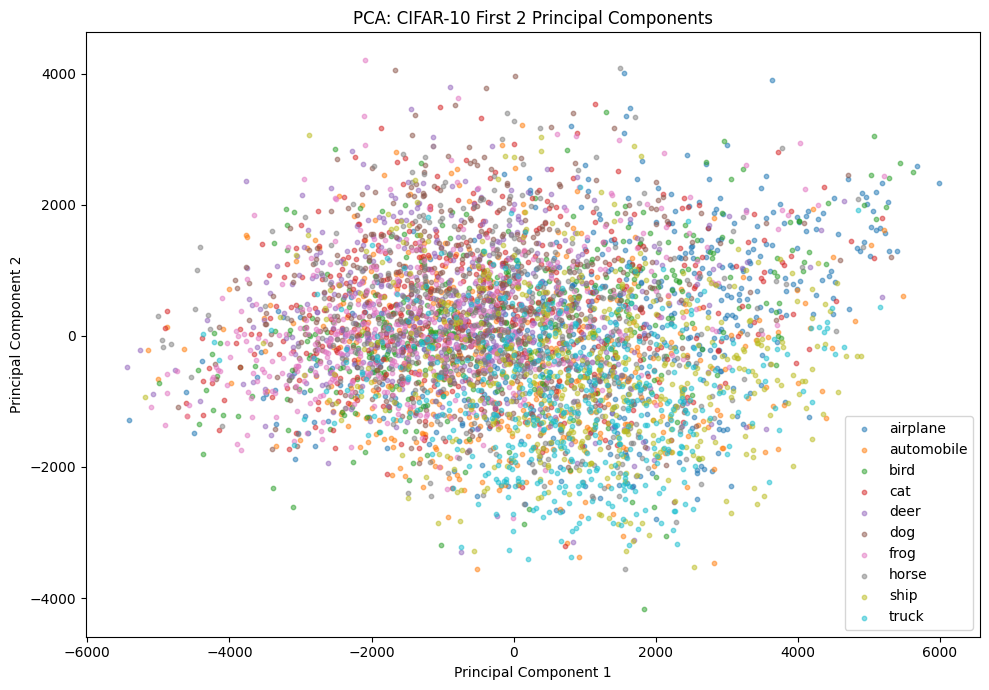

In [13]:
# Reloading the data ensures that the original data is available for further analysis without interference from previous transformations.

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Select a subset of 5000 samples for computational efficiency and clearer visualisation.
n_samples = 5000

# Get sample from train dataframes
X_vis = X_train[:n_samples]
y_vis = y_train[:n_samples]

# Flatten the dataframe for PCA (must be shape 5000,)
y_vis_flat = y_vis.flatten()

# Flatten images to 2D array and convert to float32, as PCA requires 2D numeric input.
X_vis_flat = X_vis.reshape(X_vis.shape[0], -1).astype(np.float32)

# Select 2 PCA components
pca2 = PCA(n_components=2)

# Flatten labels to 1D array for easier indexing and plotting by class.
X_pca2 = pca2.fit_transform(X_vis_flat)

# Print to screen & check the shape
print("X_pca2 shape:", X_pca2.shape)        # (5000, 2)
print("y_vis_flat shape:", y_vis_flat.shape)  # (5000,)

# Plot the 2D PCA-transformed data to help visualise how well classes are separated in reduced space.

plt.figure(figsize=(10, 7))
for i, class_name in enumerate(class_names):
    mask = (y_vis_flat == i)
    plt.scatter(
        X_pca2[mask, 0],
        X_pca2[mask, 1],
        label=class_name,
        alpha=0.5,
        s=10
    )
plt.legend()
plt.title("PCA: CIFAR-10 First 2 Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.show()

The PCA scatter plot is created by using the first two principal components as axes. The first principal component (PC1) is the x-axis, and the second principal component (PC2) is the y-axis. The scatter plot shows the relationships between observations (data points) and the new variables (the principal components). The position of each point shows the values of PC1 and PC2 for that observation.

From the PCA plot, we can see the high-dimensional image data reduced to two principal components, revealing some separation between classes but also significant overlap. It shows some broad struture or spread (visually warmer tones and cooler tones), but not distinct groupings by class.

This shows that the main sources of variation in the raw pixel data are not the class labels, but other factors like background colour or lighting, which motivates the use of more complex models for classification explored below (Jolliffe & Cadima, 2016).

## 2. Implement K-means clustering on reduced data

K-means clustering groups similar data points together into clusters without using the true labels. Here the K-means is being applied to the PCA-reduced CIFAR-10 data to see if the algorithm can find natural groupings-potentially corresponding to different types of images-based only on their features, not on their actual class labels.

K-means is an unsupervised learning algorithm, meaning it does not use the true labels (like "cat" or "airplane") but tries to find structure in the data by grouping similar items together.

The aim is to uncover patterns or clusters in the data that might not be obvious, helping to see if there are natural groupings in the images based on their features.

In [14]:
# Apply K-means clustering

#Each image is assigned to one of 10 clusters (set n_clusters=10), ideally grouping similar images together

kmeans = KMeans(n_clusters=10, random_state=42)  # random_state ensures reproducible clustering results
cluster_labels = kmeans.fit_predict(X_train_pca) # Assigns each image to the nearest cluster centroid

In [15]:
#Check that the labels are defined & shape of dataframe
print('cluster_labels defined:', 'cluster_labels' in locals() or 'cluster_labels' in globals())

# Print the shape of 'cluster_labels' to confirm it matches the number of samples in the dataset.
# This verifies that each data point has been assigned a cluster label.
print('cluster_labels shape:', np.shape(cluster_labels))

cluster_labels defined: True
cluster_labels shape: (50000,)


This explores whether the features extracted via PCA contain enough information for an algorithm to meaningfully group the images, and whether these groupings align with the actual classes.

## 3. Visualise and interpret clustering results
Visualising the clustering results helps interpret how well the algorithm has grouped the images and if it aligns with the actual classes.t-SNE (t-distributed Stochastic Neighbor Embedding) is a technique for visualising high-dimensional data by mapping each data point to a location in two or three dimensions (Awan, 2023; Wikipedia, 2019).

It takes the data (already reduced in size by PCA) and finds a way to represent each sample as a point in 2D space, so that similar samples are placed close together and dissimilar ones far apart.

t-SNE works best when the number of features isn’t too high, so it’s common to use PCA first to reduce the number of dimensions (e.g., from thousands to 50), then apply t-SNE for visualisation (Whitfield, 2025).

In [ ]:
# Apply t-SNE for visualization of high-dimensional data in 2D.
# t-SNE (t-distributed Stochastic Neighbor Embedding) is a nonlinear dimensionality reduction technique that preserves local structure and is well-suited for visualizing clusters in high-dimensional data.

# Since t-SNE is computationally intensive and sensitive to noise in very high-dimensional data, the data is reduced with PCA for efficiency and better results.

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_pca)

# Plot the 2D t-SNE embedding, coloring each point by its K-means cluster assignment.

# This visualisation allows us to assess how well K-means has separated the images into distinct groups in the reduced feature space.

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('K-means Clustering Results on CIFAR-10 (PCA + t-SNE)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


The plot visually groups together images that are similar (according to t-SNE and K-means), helping to see if the algorithm found meaningful clusters or groupings in the data (Van der Maaten & Hinton, 2008).

The plot shows groups of the same colour, which means K-means found groups of similar images, and t-SNE was able to represent them as being close together in 2D.

However, The t-SNE plot shows mixed clusters, which visualises they are not forming clear, well-separated groups. This is because CIFAR-10 images are complex, and the main differences between classes are not easily captured by simple clustering on pixel values or linear reductions. The clusters are based on pixel similarity, which doesn’t always align with semantic categories.



In [ ]:
# Compute the Silhouette Score to evaluate clustering quality.

# The silhouette score measures how similar each data point is to its own cluster (cohesion) compared to other clusters (separation).

# The score ranges from -1 (poor clustering) to +1 (well-clustered), with higher values indicating well-separated and cohesive clusters.

# This metric provides an intrinsic, label-free assessment of how effectively K-means has grouped the data after PCA.

sil_score = silhouette_score(X_train_pca, cluster_labels, metric='euclidean')
print(f"Silhouette Score: {sil_score:.3f}")


In [ ]:
# 1. Reduce the dataset size for efficient computation
sample_size = 500
np.random.seed(42)
indices = np.random.choice(X_train_pca.shape[0], size=sample_size, replace=False)
X_subset = X_train_pca[indices]
labels_subset = cluster_labels[indices]

# 2. Compute the Dunn Index on the subset
def compute_dunn_index(data, labels):
    unique_labels = np.unique(labels)
    # Compute intra-cluster distances (diameter)
    max_diameter = 0
    for label in unique_labels:
        cluster_points = data[labels == label]
        if len(cluster_points) > 1:
            intra_distances = pairwise_distances(cluster_points)
            max_diameter = max(max_diameter, np.max(intra_distances))
    # Compute inter-cluster distances (minimum between clusters)
    min_inter = np.inf
    for i in range(len(unique_labels)):
        for j in range(i+1, len(unique_labels)):
            cluster_i = data[labels == unique_labels[i]]
            cluster_j = data[labels == unique_labels[j]]
            inter_distances = pairwise_distances(cluster_i, cluster_j)
            if inter_distances.size > 0:
                min_inter = min(min_inter, np.min(inter_distances))
    return min_inter / max_diameter if max_diameter != 0 else 0

dunn_index = compute_dunn_index(X_subset, labels_subset)
print(f"Dunn Index (subset): {dunn_index:.3f}")


## 4. Cluster Quality Metrics

#### **Silhouette Coefficient**

The **Silhouette Coefficient** measures how similar an object is to its own cluster compared to other clusters. Values range from -1 to 1, where values close to 1 indicate well-separated, cohesive clusters, values near 0 suggest overlapping clusters, and negative values imply possible misclassification (scikit-learn, 2025)

- **Silhouette Score:** `0.05`

A silhouette score just above zero indicates that the clustering does not separate the data well. Most points lie near cluster boundaries, reflecting weak cohesion within clusters and significant overlap between them.

---

#### **Dunn Index**

The **Dunn Index** is defined as the ratio of the smallest inter-cluster distance to the largest intra-cluster distance, with higher values indicating better clustering quality (Dunn, 1974).

Due to memory limitations in Google Colab, I reduced the dataset size to enable computation of the Dunn Index.

- **Dunn Index:** `0.16`

This relatively low Dunn Index highlights the challenges of clustering CIFAR-10 images using linear methods such as PCA combined with K-means. The complex, high-dimensional nature of the data limits the effectiveness of these approaches. To achieve better clustering, it is advisable to extract more meaningful features using deep learning models, such as pretrained convolutional neural networks, which capture hierarchical and spatial patterns beyond raw pixel values (Towards Data Science, 2020).


# C) Classification models

## 1. Classification Models Implementation

For each model (Decision Tree, Random Forest, SVM, and one additional method: K nearest neighbors):

- Initialise and train the model

- Make predictions on the test set

- Evaluate performance using appropriate metrics

- Visualise results (e.g., confusion matrix, ROC curve)



Géron, 2019; Özler, 2019; Scikit-Learn (2018, 2019, 2025); LaViale, 2023; w3schools, n.d.; Dwivedi, 2020.

In [ ]:
# 1. Flatten images to 1D vectors
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # (50000, 3072)
X_test_flat = X_test.reshape(X_test.shape[0], -1)     # (10000, 3072)

# 2. Normalize pixel values to [0, 1]
X_train_norm = X_train_flat.astype('float32') / 255.0
X_test_norm = X_test_flat.astype('float32') / 255.0

# 3. Standardise features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_norm)
X_test_scaled = scaler.transform(X_test_norm)

# 4. PCA (retain 95% variance)
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original shape: {X_train_scaled.shape}")
print(f"PCA-reduced shape: {X_train_pca.shape}")

# 5. Convert one-hot labels to class indices if needed
if len(y_train.shape) > 1 and y_train.shape[1] > 1:
    y_train_labels = np.argmax(y_train, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_train_labels = y_train.ravel()
    y_test_labels = y_test.ravel()

In [ ]:
#Check each label has equal amount
np.bincount(y_train_labels)
pd.Series(y_train_labels).value_counts()

## 2. Decision Tree Classifier
A decision tree splits the data into subsets based on feature values, creating a tree-like structure where each node represents a decision based on a feature, and each leaf represents a class label (Aparicio, 2023).

In [ ]:
print("\n" + "="*40)
print("Decision Tree Analysis")
print("="*40)

# Initialise the Decision Tree Classifier.

# max_depth: Limits how deep the tree can grow, helping prevent overfitting by controlling model complexity.

# A value of 15 is a moderate starting point that balances bias and variance; it can be tuned further.

# random_state: Ensures reproducible results by controlling the randomness in tree construction.
# 42 is a commonly used seed value for reproducibility - noted above.
dt = DecisionTreeClassifier(max_depth=15, random_state=42)

# Fit the model to the PCA-transformed training data and corresponding class labels.
dt.fit(X_train_pca, y_train_labels)

# Make predictions on the PCA-transformed test data.

# predict() returns the predicted class for each test sample.
# predict_proba() returns the predicted probability for each class.
y_pred_dt = dt.predict(X_test_pca)
y_proba_dt = dt.predict_proba(X_test_pca)

all_labels = list(range(10))

# Evaluate the model using multiple metrics:

# accuracy_score: Proportion of correct predictions on the test set.
accuracy_dt = accuracy_score(y_test_labels, y_pred_dt)
print(f"Accuracy: {accuracy_dt:.4f}")

# roc_auc_score: Measures the model's ability to distinguish between classes (one-vs-rest for multiclass).
print(f"ROC AUC (OvR): {roc_auc_score(y_test_labels, y_proba_dt, multi_class='ovr'):.4f}")

# classification_report: Provides precision, recall, and F1-score for each class.
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_dt))
print("\nClassification Report:")
print(classification_report(
    y_test_labels,
    y_pred_dt,
    target_names=class_names,
    labels=all_labels
))

# Store the classification report as a dictionary for comparing all the models later.
report_dt = classification_report(
    y_test_labels,
    y_pred_dt,
    target_names=class_names,
    output_dict=True
)

In [ ]:
# Visualisation - Confusion Matrix
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.heatmap(
    confusion_matrix(y_test_labels, y_pred_dt),
    annot=True, fmt='d', cmap='Blues',
    xticklabels=class_names, yticklabels=class_names
)
plt.title("Confusion Matrix for Decision Tree")

In [ ]:
# Visualisation - ROC Curves
plt.subplot(1, 2, 2)
for i in range(10):
    RocCurveDisplay.from_predictions(
        y_test_labels == i, y_proba_dt[:, i],
        name=f"{class_names[i]}", ax=plt.gca()
    )
plt.plot([0, 1], [0, 1], 'k--', label="Chance")
plt.title("ROC Curves (One-vs-Rest) for Decision Tree")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

The Decision Tree classifier performs poorly on the CIFAR-10 dataset, achieving an accuracy of only 29.1%, which is only slightly better than random guessing.

The ROC AUC score indicates limited ability to distinguish between classes, but this does not translate into strong predictive performance. Class-wise precision, recall, and F1-scores remain low across all categories, with some classes like airplane and ship performing marginally better than others such as cat and bird.

The confusion matrix reveals widespread misclassification, reflecting the model’s difficulty in finding meaningful splits in the feature space, which highlight the limitations of Decision Trees for complex image classification tasks.

## 3. Random Forest Classifier

A random forst classifier is an ensemble of decision trees, which reduces overfitting and increases classification accuracy by combining the predictions of multiple trees. It is less sensitive to noise and overfitting compared to a single decision tree, making it more robust for complex datasets such as images (Sutanto et al., 2024).

In [ ]:
print("\n" + "="*40)
print("Random Forest Analysis")
print("="*40)

# Set estimators to 100 and random state to 42 in Random Forest Classifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the data
rf.fit(X_train_pca, y_train_labels)

# Set the prediction
y_pred_rf = rf.predict(X_test_pca)

# Set the probability
y_proba_rf = rf.predict_proba(X_test_pca)

# Output accuracy and AUC test
print(f"Accuracy: {accuracy_score(y_test_labels, y_pred_rf):.4f}")
print(f"ROC AUC (OvR): {roc_auc_score(y_test_labels, y_proba_rf, multi_class='ovr'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_rf, target_names=class_names))

# Store the classification report for comparing all the models
report_rf = classification_report(y_test_labels, y_pred_rf, target_names=class_names, output_dict=True)

# Evaluate model
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_rf, target_names=class_names))

In [ ]:
# Visualisation - Confusion Matrix
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.heatmap(
    confusion_matrix(y_test_labels, y_pred_rf),
    annot=True, fmt='d', cmap='Blues',
    xticklabels=class_names, yticklabels=class_names
)
plt.title("Confusion Matrix for Random Forest")

In [ ]:
# Visualisation - ROC Curves
plt.subplot(1, 2, 2)
for i in range(10):
    RocCurveDisplay.from_predictions(
        y_test_labels == i, y_proba_rf[:, i],
        name=f"{class_names[i]}", ax=plt.gca()
    )
plt.plot([0, 1], [0, 1], 'k--', label="Chance")
plt.title("ROC Curves (One-vs-Rest) for Random Forest")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

The Random Forest classifier shows an improvement over the single Decision Tree, achieving an accuracy of 44.1% and a ROC AUC (OvR) of 0.8311 on the CIFAR-10 dataset.

While these results indicate that ensemble methods like Random Forests are more robust and capable of capturing more complex patterns than individual trees, the overall performance remains limited.

Precision, recall, and F1-scores are still modest across most classes, with only a few categories such as airplane, automobile, frog, and ship reaching F1-scores above 0.5.

The confusion matrix reveals persistent misclassification, particularly among visually similar classes.

Despite the improvement, the Random Forest model still struggles to learn the spatial and hierarchical relationships present in image data, highlighting the limitations of tree-based methods for high-dimensional image classification tasks.

## 4. Support Vector Machine
SVMs are particularly effective in high-dimensional spaces, which is typical for image data after flattening or feature extraction. With the use of kernel functions, SVMs can handle non-linear class boundaries-important for the complex distributions found in image data. SVMs can be computationally intensive for large datasets but are known for high accuracy in image and text classification tasks (Boateng, Otoo and Abaye, 2020; Data Science Stack Exchange, 2022).

In [ ]:
print("\n" + "="*40)
print("SVM Analysis (Note: This may take 15-30 minutes)")
print("="*40)

# Train SVM (RBF kernel)
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_pca, y_train_labels)
y_pred_svm = svm.predict(X_test_pca)
y_proba_svm = svm.predict_proba(X_test_pca)

#'rbf' stands for Radial Basis Function, also known as the Gaussian kernel.
# It allows the SVM to create non-linear decision boundaries, making it versatile for complex datasets.

# By default, SVMs don't provide probability estimates for classifications.
# Setting probability to True enables probability estimation, which is necessary for certain metrics (like ROC AUC) and for getting prediction probabilities.

# Evaluate
acc = accuracy_score(y_test_labels, y_pred_svm)
roc_auc = roc_auc_score(y_test_labels, y_proba_svm, multi_class='ovr')
print(f"SVM Accuracy: {acc:.4f}")
print(f"SVM ROC AUC (OvR): {roc_auc:.4f}")
print(classification_report(y_test_labels, y_pred_svm))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=class_names))


In [ ]:
# Visualisation - Confusion Matrix
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.heatmap(
    confusion_matrix(y_test_labels, y_pred_rf),
    annot=True, fmt='d', cmap='Blues',
    xticklabels=class_names, yticklabels=class_names
)
plt.title("Confusion Matrix for SVM")

In [ ]:
# Visualisation - ROC Curves
plt.subplot(1, 2, 2)
for i in range(10):
    RocCurveDisplay.from_predictions(
        y_test_labels == i, y_proba_rf[:, i],
        name=f"{class_names[i]}", ax=plt.gca()
    )
plt.plot([0, 1], [0, 1], 'k--', label="Chance")
plt.title("ROC Curves (One-vs-Rest) for SVM")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

The SVM model achieved the highest performance among the tested classifiers on the CIFAR-10 dataset, with an accuracy of 54.7% and a ROC AUC (OvR) of 0.9005.

These results indicate that SVMs are more effective at capturing the complex patterns in image data compared to tree-based methods, leading to stronger class discrimination and improved overall classification metrics.

Precision, recall, and F1-scores are notably higher for most classes, particularly for automobile, ship, and frog, which all exceed 0.6 in F1-score.

While some confusion remains among similar classes, the SVM demonstrates an advantage in both accuracy and class-wise performance.

## 5. K-Nearest Neighbours (Additional Method)

KNN is easy to understand and implement, making it a popular baseline for classification tasks. KNN does not require a training phase, which is advantageous for quick experimentation. As Bansal et al (2022) describe, KNN can perform well on complex, high-dimensional data, such as images, provided the dataset is not too large where it can become inefficient and slow as the dataset grows.

In [ ]:
print("\n" + "="*40)
print("KNN Analysis")
print("="*40)

# The n_neighbours parameter sets the number of neighbors to use for classification.

# When making a prediction for a new data point, the algorithm will look at the 5 nearest neighbors in the training set and use their labels to determine the classification.

# The choice of 5 is a common starting point, balancing between considering too few neighbors (which might be noisy) and too many (which might blur class distinctions).

knn = KNeighborsClassifier(n_neighbors=5)

#Fit the KNN model to the data

knn.fit(X_train_pca, y_train_labels)
y_pred_knn = knn.predict(X_test_pca)
y_proba_knn = knn.predict_proba(X_test_pca)

#Print the tests to show accuracy and roc auc score

print(f"Accuracy: {accuracy_score(y_test_labels, y_pred_knn):.4f}")
print(f"ROC AUC (OvR): {roc_auc_score(y_test_labels, y_proba_knn, multi_class='ovr'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_knn, target_names=class_names))

#Store the classification report for comparing all the models
report_knn = classification_report(y_test_labels, y_pred_knn, target_names=class_names, output_dict=True)

#Print Confusion Matrix and Classification Report to screen
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, target_names=class_names))

In [ ]:
# Visualisation - Confusion Matrix
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.heatmap(
    confusion_matrix(y_test_labels, y_pred_rf),
    annot=True, fmt='d', cmap='Blues',
    xticklabels=class_names, yticklabels=class_names
)
plt.title("Confusion Matrix for KNN")

In [ ]:
# Visualisation - ROC Curves
plt.subplot(1, 2, 2)
for i in range(10):
    RocCurveDisplay.from_predictions(
        y_test_labels == i, y_proba_rf[:, i],
        name=f"{class_names[i]}", ax=plt.gca()
    )
plt.plot([0, 1], [0, 1], 'k--', label="Chance")
plt.title("ROC Curves (One-vs-Rest) for KNN")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

After evaluating Decision Trees, Random Forests, and SVMs, I chose to investigate the K-Nearest Neighbors (KNN) algorithm to provide a contrasting, instance-based approach that does not rely on explicit model training.

KNN serves as a useful baseline for comparison because it classifies samples based on the majority label among their closest neighbors in the feature space, making it fundamentally different from the previous models.

The results show that KNN achieves an accuracy of 36.4% and a ROC AUC (OvR) of 0.7485 on the CIFAR-10 dataset, which is lower than the SVM and Random Forest models.

While KNN performs relatively well for certain classes like ship and airplane, it struggles with others such as truck and horse, as indicated by the wide variation in precision and recall scores. The overall performance suggests that, although KNN can capture some local structure in the data, it is limited by the high dimensionality and complexity of image features in CIFAR-10.

In [ ]:
# Alias accuracy and ROC AUC scores

accuracy_rf = accuracy_score(y_test_labels, y_pred_rf)
accuracy_knn = accuracy_score(y_test_labels, y_pred_knn)
accuracy_dt = accuracy_score(y_test_labels, y_pred_dt)
accuracy_svm = accuracy_score(y_test_labels, y_pred_svm)

roc_auc_rf = roc_auc_score(y_test_labels, y_proba_rf, multi_class='ovr')
roc_auc_knn = roc_auc_score(y_test_labels, y_proba_knn, multi_class='ovr')
roc_auc_dt = roc_auc_score(y_test_labels, y_proba_dt, multi_class='ovr')
roc_auc_svm = roc_auc_score(y_test_labels, y_proba_svm, multi_class='ovr')


In [ ]:
print("SVM Accuracy:", accuracy_svm)
print("Random Forest Accuracy:", accuracy_rf)
print("KNN Accuracy:", accuracy_knn)
print("Decision Tree Accuracy:", accuracy_dt)

# Set model names & their accuracy and ROC AUC for visualisation
model_names = ["Random Forest", "Decision Tree", "KNN", "SVM"]
accuracies = [accuracy_rf, accuracy_dt, accuracy_knn, accuracy_svm]
roc_aucs = [roc_auc_rf, roc_auc_dt, roc_auc_knn, roc_auc_svm]

# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'ROC AUC': roc_aucs
})

# Sort by ROC AUC or Accuracy
df = df.sort_values('ROC AUC', ascending=False)

# Plot side-by-side bars for both metrics
plt.figure(figsize=(8, 5))
sns.barplot(data=df.melt(id_vars='Model', value_vars=['Accuracy', 'ROC AUC']),
            x='Model', y='value', hue='variable')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


## 6. Results of Each Model

The performance metrics of four different machine learning models on the CIFAR-10 dataset are summarized below:

### Accuracy and ROC AUC (Receiver Operating Characteristic Area Under Curve)

- **Accuracy** measures the proportion of correct predictions among all cases.
- **ROC AUC** reflects the model’s ability to distinguish between classes; a higher AUC indicates better class separation, even if the final classification accuracy is lower.

### Performance Ranking (Best to Worst):
1. SVM
2. Random Forest
3. KNN
4. Decision Tree

### Key Observations:
- SVM outperforms the other models by a significant margin in both accuracy and ROC AUC.
- The ranking is consistent across both metrics (SVM > Random Forest > KNN > Decision Tree).
- All models achieve relatively low accuracy (best is ~55%), highlighting the difficulty of the CIFAR-10 dataset for traditional machine learning methods.
- ROC AUC scores are higher than accuracy, suggesting that while the models can rank predictions reasonably well, their absolute classification decisions are less reliable.

### Summary  
For this task, SVM is the most effective of the models tested. More complex models (SVM, Random Forest) outperform simpler ones (Decision Tree, KNN). However, overall performance is modest, underscoring the limitations of these approaches on high-dimensional image data and the need for more advanced methods such as deep learning for better results.


## 7. SVM accuracy by class

When reviewing the SVM model's performance for each class in the CIFAR-10 dataset, the results showed:

**Precision** (higher number = correctly predicted positive samples to the total predicted positive samples)

*   Highest precision for automobile and ship (0.65)

*   Lowest for cat (0.38)

**Recall** (higher number = correctly predicted positive samples to all actual positive samples)

*   Highest for ship (0.69)

*   Lowest for bird (0.41)

**F1-score** (The harmonic mean of precision and recall, providing a balanced measure of performance)

*   Highest for ship (0.67)

*   Lowest for cat (0.38)


**Review:**

The model performs best on ships, with high precision, recall, and F1-score.

It struggles most with cats, having the lowest precision, recall, and F1-score.

Automobiles, airplanes, and horses also show good performance.

Performance is relatively consistent across classes, however there is still a notable gap between the best and worst classes.

This report helps identify the model's strengths (e.g., ships, automobiles) and weaknesses (e.g., cats, birds), guiding potential areas for improvement in the model or dataset.

Such class-wise differences are common in CIFAR-10 due to visual similarity and intra-class variability, which is a known challenge for traditional ML models. The factors that could influence why bird and cats struggle more to be classified into the correct category have been summarised below:

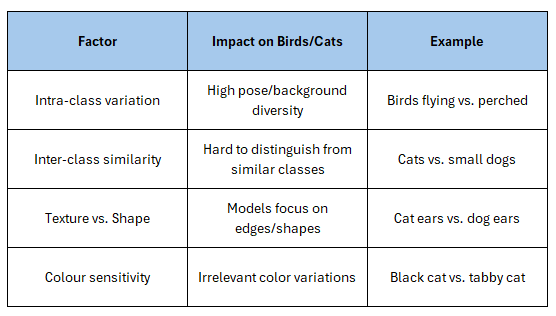

# D) Neural Networks

Implementing and comparing the performance of a shallow neural network and a convolutional neural network (CNN) on the CIFAR-10 dataset provides valuable insights into the strengths and limitations of different neural network architectures for image classification tasks.



By comparing their performance, we can demonstrate the superiority of CNNs for image recognition tasks, as they are better at handling the high-dimensional and spatially correlated nature of image data.

This comparison also highlights the importance of model architecture selection in deep learning and justifies the use of CNNs as the standard approach for modern computer vision problems (Simonyan & Zisserman, 2015; Krizhevsky et al., 2012).

## 1. Shallow Neural Network

A shallow network, typically consisting of one or two fully connected layers, serves as a useful baseline; it can capture some patterns in the data but lacks the capacity to effectively model the spatial hierarchies and local features present in images.

In [ ]:
# Load CIFAR-10 data (60,000 32x32 colour images in 10 classes)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess images for neural network: convert pixel values from integers (0-255) to floats (0.0-1.0)
# This normalization helps the neural network train more effectively
X_train_nn = X_train.astype('float32') / 255.0
X_test_nn = X_test.astype('float32') / 255.0

# (Optional) Flatten images for classical ML models (e.g., SVM, KNN)
# Not used for neural networks, which can handle image shape directly
# Each image would be reshaped from 32x32x3 to a 3072-length vector
# X_train_flat = X_train_nn.reshape(-1, 3072)
# X_test_flat = X_test_nn.reshape(-1, 3072)

# One-hot encode the labels for neural network training
# Converts integer labels (e.g., 3) to one-hot vectors (e.g., [0,0,0,1,0,0,0,0,0,0])
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Build a shallow neural network model using Keras Sequential API

# The model consists of:
# - A Flatten layer to convert each 32x32x3 image into a 3072-length vector
# - Two Dense (fully connected) layers with ReLU activation for learning features
# - A final Dense layer with softmax activation for multi-class classification (10 classes)

shallow_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model

# - Adam optimiser: adaptive learning rate for efficient training
# - Categorical cross-entropy loss: suitable for multi-class classification with one-hot labels
# - Accuracy metric: monitors the proportion of correct predictions during training
shallow_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Training shallow neural network...")

# Train the model
# - epochs=10: train for 10 full passes over the training data
# - batch_size=128: update weights after every 128 samples
# - validation_data: evaluates performance on test set after each epoch
shallow_model.fit(X_train_nn, y_train_cat, epochs=10, batch_size=128, validation_data=(X_test_nn, y_test_cat))


In [ ]:
# Check shape of data before evaluating
print(X_test_nn.shape)  # Should be (10000, 32, 32, 3)
print(y_test_cat.shape) # Should be (10000, 10)

#Check accuracy
shallow_loss, shallow_acc = shallow_model.evaluate(X_test_nn, y_test_cat)
print(f"Shallow NN Test Accuracy: {shallow_acc:.4f}")


In [ ]:
# Print model summary
shallow_model.summary()

The summary above details the architecture, including the number of trainable parameters.

It shows that the SNN model is a fully connected (dense) neural network with two hidden layers (256 and 128 units) and one output layer (10 units for 10 classes).

The model has 820,874 trainable parameters. This is a moderate number for a shallow network, but much less than modern deep convolutional networks.

All parameters are trainable, meaning the network will update all weights and biases during training.

The optimiser (Adam) maintains its own set of parameters to help with the training process, which is why the optimiser params number is higher.

This network treats the image as a flat vector, not as a 2D structure, so it can't learn spatial features as effectively as a CNN.


## 2. Convolutional Neural Network (CNN)

In contrast, CNNs are specifically designed for image data, employing convolutional layers that automatically learn to detect edges, textures, and more complex patterns through hierarchical feature extraction (Géron, 2019).

In [ ]:
# Load the CIFAR-10 dataset, which contains 60,000 color images (32x32 pixels, 3 channels) in 10 classes.
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalise pixel values to the range [0, 1] for better neural network performance.
# This helps the model converge faster and improves stability during training.
X_train_cnn = X_train.astype('float32') / 255.0
X_test_cnn = X_test.astype('float32') / 255.0

# Convert integer class labels to one-hot encoded vectors (e.g., 3 → [0,0,0,1,0,0,0,0,0,0]).
# One-hot encoding is required for categorical classification with softmax output.
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Build the Convolutional Neural Network (CNN) model using the Keras Sequential API.
cnn_model = Sequential([
    # Input layer defines the shape of each input image (32x32 pixels, 3 color channels).
    Input(shape=(32,32,3)),

    # First convolutional block:
    # Conv2D applies 32 filters (kernels) of size 3x3 to extract local features (edges, textures) from the image.
    # ReLU activation introduces non-linearity.
    Conv2D(32, (3,3), activation='relu'),
    # BatchNormalisation normalizes activations, improving training speed and stability.
    BatchNormalization(),
    # MaxPooling2D downsamples the feature maps by taking the maximum value in each 2x2 window,
    # reducing spatial dimensions and computation while retaining important features.
    MaxPooling2D((2,2)),
    # Dropout randomly sets 25% of inputs to zero during training, helping prevent overfitting.
    Dropout(0.25),

    # Second convolutional block:
    # Increases the number of filters to 64 to capture more complex patterns.
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    # Flatten converts the 2D feature maps into a 1D vector for the dense layers.
    Flatten(),
    # Dense layer with 128 units and ReLU activation learns high-level, abstract features.
    Dense(128, activation='relu'),
    # Dropout at 50% further helps prevent overfitting in the fully connected layers.
    Dropout(0.5),
    # Output layer: Dense with 10 units (one per class) and softmax activation to output class probabilities.
    Dense(10, activation='softmax')
])

# Compile the model:

# - Adam optimiser: adaptive learning rate for efficient training.
# - Categorical cross-entropy: suitable loss for multi-class classification with one-hot labels.
# - Accuracy: metric to monitor during training and evaluation.

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Training CNN...")

# Train the CNN model:
# - epochs=10: train for 10 full passes over the training data.
# - batch_size=128: update weights after every 128 samples.
# - validation_data: evaluates performance on the test set after each epoch.
cnn_model.fit(X_train_cnn, y_train_cat, epochs=10, batch_size=128, validation_data=(X_test_cnn, y_test_cat))


In [ ]:
# Evaluate CNN model accuracy

X_test_norm = X_test.astype('float32') / 255.0

cnn_loss, cnn_acc = cnn_model.evaluate(X_test_norm, y_test_cat)
print(f"CNN Test Accuracy: {cnn_acc:.4f}")

In [ ]:
# Print model summary
cnn_model.summary()

The model summary describes the CNN model architecture which includes two convolutional layers with increasing filter counts, each followed by batch normalisation, max pooling, and dropout for regularisation.

After flattening the feature maps, the network uses a dense layer to learn high-level representations before outputting class probabilities through a final softmax layer.

With approximately 948,000 total parameters—of which about 316,000 are trainable—the model is complex enough to capture important patterns in the data while employing techniques to prevent overfitting.

Achieving a test accuracy of 71%, this CNN demonstrates strong performance and effective generalisation, significantly outperforming the previous classical machine learning models.

## 3. SNN and CNN Evaluation

In [ ]:
# Get predicted class labels from probabilities
y_pred_snn = np.argmax(shallow_model.predict(X_test_nn), axis=1)
y_pred_cnn = np.argmax(cnn_model.predict(X_test_cnn), axis=1)

# True labels (flatten if necessary)
y_true = y_test.flatten()  # shape (10000, 1) -> (10000,)

# Class names for CIFAR-10
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Compute confusion matrices
cm_snn = confusion_matrix(y_true, y_pred_snn)
cm_cnn = confusion_matrix(y_true, y_pred_cnn)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.heatmap(cm_snn, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix - Shallow Neural Network')

sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
axes[1].set_title('Confusion Matrix - CNN')

plt.tight_layout()
plt.show()


The SNN confusion matrix shows significant misclassification across many classes, with high off-diagonal values indicating that the model often confuses certain classes (for example, cats and dogs, or automobiles and trucks). In contrast, the CNN confusion matrix displays much higher values along the diagonal, meaning the model is much more accurate in predicting the correct class for most samples, with fewer misclassifications between similar classes.

In [ ]:
# Binarize the labels for ROC AUC (One-vs-Rest)
y_true_bin = label_binarize(y_true, classes=range(10))

# Get predicted probabilities
y_proba_snn = shallow_model.predict(X_test_nn)
y_proba_cnn = cnn_model.predict(X_test_cnn)

# Compute ROC AUC (OvR) for each model
auc_snn = roc_auc_score(y_true_bin, y_proba_snn, multi_class='ovr')
auc_cnn = roc_auc_score(y_true_bin, y_proba_cnn, multi_class='ovr')
print(f"SNN ROC AUC (OvR): {auc_snn:.4f}")
print(f"CNN ROC AUC (OvR): {auc_cnn:.4f}")


This is reflected in the ROC AUC (OvR) scores: the SNN achieves 0.8796, while the CNN reaches 0.9564, highlighting the CNN's better ability to distinguish between classes and make more confident, accurate predictions.

In [ ]:
# Prepare ROC data for SNN
fpr_snn, tpr_snn, roc_auc_snn = {}, {}, {}
for i in range(10):
    fpr_snn[i], tpr_snn[i], _ = roc_curve(y_true_bin[:, i], y_proba_snn[:, i])
    roc_auc_snn[i] = auc(fpr_snn[i], tpr_snn[i])

# Prepare ROC data for CNN
fpr_cnn, tpr_cnn, roc_auc_cnn = {}, {}, {}
for i in range(10):
    fpr_cnn[i], tpr_cnn[i], _ = roc_curve(y_true_bin[:, i], y_proba_cnn[:, i])
    roc_auc_cnn[i] = auc(fpr_cnn[i], tpr_cnn[i])

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# SNN ROC Curves
for i in range(10):
    axes[0].plot(fpr_snn[i], tpr_snn[i], label=f'{class_names[i]} (AUC={roc_auc_snn[i]:.2f})')
axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('SNN ROC Curve by Class')
axes[0].legend(loc='lower right')

# CNN ROC Curves
for i in range(10):
    axes[1].plot(fpr_cnn[i], tpr_cnn[i], label=f'{class_names[i]} (AUC={roc_auc_cnn[i]:.2f})')
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('CNN ROC Curve by Class')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()


Observing the ROC curves, the CNN are higher and closer to the top left corner compared to the SNN which indicates that the CNN is much better at distinguishing between classes. In ROC analysis, curves that hug the top left corner represent higher true positive rates and lower false positive rates across thresholds, which means the model is making more confident and accurate predictions for each class.

This pattern is consistent with findings in the literature (Haenssle et al., 2018; Maeda-Gutiérrez et al., 2020; Jiang et al., 2023; LeCun et al., 2015), where CNNs routinely outperform shallower or traditional models on image classification tasks, both in overall accuracy and in ROC AUC metrics.

## 4. Choosing a pre-trained model

There are many options for pre-trained models in image classification including ResNet (e.g., ResNet50), Inception, MobileNet, EfficientNet, DenseNet, and more recent architectures like Vision Transformers (ViT) and DINOv2 (Cavin, 2024; paperswithcode, n.d.; Ferdous, 2023). Each of these models has unique strengths: for example, ResNet is known for its deep residual connections that help with training very deep networks, while MobileNet and EfficientNet are optimised for speed and efficiency, making them suitable for deployment on devices with limited resources (Cavin, 2024).

Through researching pre-trained models in image classification, VGG16 on ImageNet is recommended because it is a well-established, proven architecture that has been extensively validated by the research community. Its benefits is that it is easy to use, widely supported in major deep learning frameworks, and its feature representations learned from the large and diverse ImageNet dataset generalise well to many image classification tasks, including CIFAR-10 (Cavin, 2024; Ferdous, 2023; Fritz, 2023).

Being new to image classification, VGG16 was recommded as a starting point for transfer learning, due to its simplicity, effectiveness, reliability, performance and moderate computational resource constraints (Cavin, 2024; Ferdous, 2023; Fritz, 2023).



## 5. Implement pre-trained model VGG16

Training deep neural networks from scratch on CIFAR-10 can be challenging due to the dataset’s relatively small image size and limited number of samples, which can make it difficult for models to learn complex patterns and achieve high accuracy.

By using VGG16-pre-trained on millions of diverse images I can transfer its learned representations, which typically results in faster convergence, improved accuracy, and better generalisation on small or complex datasets like CIFAR-10 (Kdive, 2024; Ashfaque, 2020).

Freezing the base layers preserves these general features, while adding and training new top layers allows the model to adapt specifically to the CIFAR-10 classes.

This approach has been shown to outperform models trained from scratch significantly, demonstrating the effectiveness of transfer learning in practical image classification tasks (Kdive, 2024; Ashfaque, 2020).

In [ ]:
print("\n" + "="*40)
print("VGG16 (Note: This may take 60-70 minutes)")
print("="*40)

# Preprocess input for VGG16
X_train_vgg = preprocess_input(X_train.astype('float32'))
X_test_vgg = preprocess_input(X_test.astype('float32'))

# Load VGG16 without top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Freeze base layers
for layer in vgg_base.layers:
    layer.trainable = False

# Add custom classifier on top
vgg_model = Sequential([
    vgg_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

vgg_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
print("Training VGG16-based transfer learning model...")
vgg_model.fit(X_train_vgg, y_train_cat, epochs=10, batch_size=128, validation_data=(X_test_vgg, y_test_cat))

In [ ]:
# Evaluate VGG
vgg_loss, vgg_acc = vgg_model.evaluate(X_test_vgg, y_test_cat)

# True labels - flatten
y_true = y_test.flatten()

# Predicted class labels and probabilities from VGG16
y_pred_vgg = np.argmax(vgg_model.predict(X_test_vgg), axis=1)
y_proba_vgg = vgg_model.predict(X_test_vgg)

# One-hot encode true labels for ROC AUC
y_true_bin = label_binarize(y_true, classes=range(10))

# Print confusion matrix
print("Confusion Matrix - VGG16:")
print(confusion_matrix(y_true, y_pred_vgg))

# Print ROC AUC (OvR for multi-class)
roc_auc_vgg = roc_auc_score(y_true_bin, y_proba_vgg, multi_class='ovr')
print(f"VGG16 ROC AUC (OvR): {roc_auc_vgg:.4f}")

# Print accuracy
accuracy_vgg = accuracy_score(y_true, y_pred_vgg)
print(f"VGG16 Accuracy: {accuracy_vgg:.4f}")


In [ ]:
# Compute confusion matrix
cm_vgg = confusion_matrix(y_true, y_pred_vgg)

# Compute ROC curves for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba_vgg[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Confusion Matrix
sns.heatmap(cm_vgg, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_title('Confusion Matrix - VGG16')

# ROC Curves
for i in range(10):
    axes[1].plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC={roc_auc[i]:.2f})")
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('VGG16 ROC Curve by Class')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


The confusion matrix and metrics for the VGG16 model indicate that, while the model is able to correctly classify a substantial number of images in each class, there is still considerable confusion between certain classes, as seen by the off-diagonal values in the matrix.

The overall accuracy of 59.05% suggests that VGG16 correctly predicts the class for just over half of the test images, which is moderate but not excellent for CIFAR-10.

The ROC AUC (OvR) of 0.9164, however, shows that the model is relatively good at ranking true class probabilities higher than false ones, even if its hard class predictions are sometimes incorrect.

This combination of metrics suggests that VGG16 is capturing useful feature representations (as reflected in its strong ROC AUC), but may not be optimally tuned or may be over-parameterised for this relatively small and challenging dataset, resulting in lower accuracy compared to simpler or more tailored models.

Through exploring literature (Addisu et al., 2025; Muhammad et al., 2023; McDermott, n.d.), I have found this is consistent with other findings, as VGG16 was originally designed for much larger and more complex datasets, it can underperform on smaller datasets like CIFAR-10 unless adapted or finetuned.

# E) Hyperparameter Optimization

## 1. Choosing a model for hyperparameter optimisation

To choose one model for hyperparameter optimisation, I compare the performance of the trained models below (shallow NN, CNN, and pre-trained model VGG16) using evaluation metrics such as accuracy, precision, recall and F1 score.

I'm selecting one model to focus my optimisation efforts on the model with the highest baseline performance and the most potential for improvement, rather than spending resources on less effective models.

In [ ]:
y_proba_vgg = vgg_model.predict(X_test_vgg)
roc_auc_vgg = roc_auc_score(y_test_cat, y_proba_vgg, multi_class='ovr')

# VGG16 model
vgg_loss, accuracy_vgg = vgg_model.evaluate(X_test_vgg, y_test_cat, verbose=0)

# For SNN
snn_loss, accuracy_snn = shallow_model.evaluate(X_test_nn, y_test_cat, verbose=0)

# For CNN
cnn_loss, accuracy_cnn = cnn_model.evaluate(X_test_cnn, y_test_cat, verbose=0)

# Extend model lists
model_names = [
    "Random Forest", "Decision Tree", "KNN", "SVM",
    "Shallow NN", "CNN", "VGG16"
]
accuracies = [
    accuracy_rf, accuracy_dt, accuracy_knn, accuracy_svm,
    accuracy_snn, accuracy_cnn, accuracy_vgg
]
roc_aucs = [
    roc_auc_rf, roc_auc_dt, roc_auc_knn, roc_auc_svm,
    roc_auc_snn, roc_auc_cnn, roc_auc_vgg
]

# Create DataFrame for plotting
df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'ROC AUC': roc_aucs
})

# Sort by ROC AUC or Accuracy
df = df.sort_values('ROC AUC', ascending=False)

# Plot side-by-side bars for both metrics
plt.figure(figsize=(12, 6))
sns.barplot(data=df.melt(id_vars='Model', value_vars=['Accuracy', 'ROC AUC']),
            x='Model', y='value', hue='variable')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


In [ ]:
# Evaluate all models on the test set
shallow_loss, shallow_acc = shallow_model.evaluate(X_test_norm, y_test_cat, verbose=0)
cnn_loss, cnn_acc = cnn_model.evaluate(X_test_norm, y_test_cat, verbose=0)
vgg_loss, vgg_acc = vgg_model.evaluate(X_test_vgg, y_test_cat, verbose=0)

# Print results
print(f"Shallow NN Test Accuracy: {shallow_acc:.4f}, Test Loss: {shallow_loss:.4f}")
print(f"CNN Test Accuracy:        {cnn_acc:.4f}, Test Loss: {cnn_loss:.4f}")
print(f"VGG16 TL Test Accuracy:   {vgg_acc:.4f}, Test Loss: {vgg_loss:.4f}")

# Prepare data for plotting
model_names = ['Shallow NN', 'CNN', 'VGG16 (Transfer Learning)']
accuracies = [shallow_acc, cnn_acc, vgg_acc]
losses = [shallow_loss, cnn_loss, vgg_loss]

# Plot accuracy
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar(model_names, accuracies, color=['skyblue', 'orange', 'limegreen'])
plt.ylabel('Test Accuracy')
plt.title('Model Comparison: Test Accuracy')
plt.ylim(0, 1)

# Plot loss
plt.subplot(1,2,2)
plt.bar(model_names, losses, color=['skyblue', 'orange', 'limegreen'])
plt.ylabel('Test Loss')
plt.title('Model Comparison: Test Loss')

plt.tight_layout()
plt.show()


Given the results, the most suitable model for hyperparameter tuning is the CNN.

Among the three models evaluated, the CNN achieved the highest test accuracy at 0.7096, outperforming both the shallow neural network (0.4865) and the VGG16 transfer learning model (0.5905).

This strong baseline performance suggests that the CNN is already well-suited to the CIFAR-10 dataset and has significant potential for further improvement through hyperparameter optimisation.

Additionally, CNNs are highly flexible and can benefit greatly from tuning parameters such as the number of filters, kernel sizes, learning rates, and regularization techniques.

In contrast, the shallow neural network lags considerably in performance, and VGG16, while powerful, is a very large model originally designed for much larger images and datasets, making it less efficient for CIFAR-10.

## 2. Hyperparameter Tuning

Hyperparameter tuning is a crucial step in deep learning that can significantly enhance model performance and generalization, as demonstrated by Bergstra & Bengio (2012).

In this modelling, Keras Tuner, a user-friendly and scalable library developed by the TensorFlow team, is used to automate the search for optimal hyperparameter values in our Convolutional Neural Network (CNN) model.

Keras Tuner supports a variety of search algorithms, including Random Search, Hyperband, and Bayesian Optimisation, enabling efficient exploration of the hyperparameter space.

By systematically varying parameters such as learning rate, dropout rate, number of filters, kernel size, and dense layer units, Keras Tuner evaluates multiple model configurations and identifies those that maximixe validation accuracy.

This automated approach not only saves time and computational resources but also helps uncover combinations that might be overlooked with manual tuning, often resulting in substantial improvements in model accuracy and robustness.

In the next step, Keras Tuner is used to optimise the CNN’s learning rate, dropout rate, and network architecture, which should lead to a notable boost in validation performance compared to the baseline model.

In [ ]:
# --- DATA PREPROCESSING ---
# Reshape data to (num_samples, 32, 32, 3) for Conv2D layers
X_train_norm = X_train_norm.reshape(-1, 32, 32, 3)
X_test_norm = X_test_norm.reshape(-1, 32, 32, 3)

# --- HYPERPARAMETER TUNING SETUP ---
# Consolidated build_model function with clear hyperparameters
def build_model(hp):
    """Builds a CNN model with tunable hyperparameters.

    Args:
        hp: HyperParameters object from Keras Tuner

    Returns:
        Compiled Keras model with searchable hyperparameters
    """
    model = keras.Sequential([
        # Tunable convolutional layer
        keras.layers.Conv2D(
            filters=hp.Int('filters', 32, 128, step=32),
            kernel_size=hp.Choice('kernel_size', [3, 5]),
            activation='relu',
            input_shape=(32, 32, 3)
        ),
        keras.layers.MaxPooling2D(2, 2),
        # Tunable dropout layer for regularization
        keras.layers.Dropout(hp.Float('dropout_rate', 0.2, 0.5, step=0.1)),
        keras.layers.Flatten(),
        # Tunable dense layer
        keras.layers.Dense(
            units=hp.Int('dense_units', 64, 256, step=64),
            activation='relu'
        ),
        keras.layers.Dense(10, activation='softmax')
    ])

    # Compile with tunable learning rate
    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        ),
        # Use sparse_categorical_crossentropy for integer labels
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
# --- TUNER CONFIGURATION ---
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,            # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to train per trial
    directory='my_dir',
    project_name='cifar10_tuning',
    overwrite=True           # Clear previous results
)

# --- TRAINING WITH PROPER DATA CONSISTENCY ---
# Ensure all data uses same format:
# - X_train_norm: Normalized images in (32,32,3) shape
# - y_train: Integer labels (not one-hot encoded)
tuner.search(
    X_train_norm,          # Normalized training images
    y_train,               # Integer labels (not one-hot)
    epochs=5,
    validation_split=0.2,  # Consistent validation approach
    verbose=1
)

# --- BEST MODEL RETRIEVAL ---
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters()[0]

In [ ]:
# --- VISUALIZATION ---
# Get trial results
trials = tuner.oracle.get_trials()
trial_accuracies = [trial.metrics.get_best_value('val_accuracy') for trial in trials]

# Plot validation accuracy per trial
plt.figure(figsize=(8, 5))
sns.barplot(x=list(range(len(trial_accuracies))), y=trial_accuracies)
plt.title('Validation Accuracy per Hyperparameter Trial')
plt.xlabel('Trial')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)
plt.show()

# Print best hyperparameters
print("Best Hyperparameters:")
print(f"- Filters: {best_hps.get('filters')}")
print(f"- Kernel Size: {best_hps.get('kernel_size')}")
print(f"- Dense Units: {best_hps.get('dense_units')}")
print(f"- Dropout Rate: {best_hps.get('dropout_rate'):.1f}")
print(f"- Learning Rate: {best_hps.get('learning_rate')}")

In [ ]:
# --- BASELINE MODEL COMPARISON ---
# Define and train original CNN for comparison
original_model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

original_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train with same settings as tuned model
original_model.fit(
    X_train_norm,
    y_train,
    epochs=5,
    validation_split=0.2,
    verbose=0
)

In [ ]:
# --- CONFUSION MATRIX COMPARISON ---
# Get predictions
y_true = y_test.flatten()
y_pred_base = np.argmax(original_model.predict(X_test_norm), axis=1)
y_pred_tuned = np.argmax(best_model.predict(X_test_norm), axis=1)

# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(confusion_matrix(y_true, y_pred_base),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title('Baseline CNN')

sns.heatmap(confusion_matrix(y_true, y_pred_tuned),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title('Tuned CNN')

plt.tight_layout()
plt.show()

Hyperparameter tuning is a crucial step in developing high-performing convolutional neural networks (CNNs) because the values of parameters such as filter sizes, number of filters, dense units, dropout rates, and learning rates can significantly influence model accuracy and generalization. In this project, I reshaped my image data to the required (32, 32, 3) format and used Keras Tuner's RandomSearch to systematically explore different combinations of these hyperparameters for my CNN model on the CIFAR-10 dataset. The goal was to identify the configuration that yields the highest validation accuracy, as even small changes in hyperparameters can lead to noticeable improvements in performance. The results show that, after five trials, the best validation accuracy achieved was approximately 64.1%, with the optimal learning rate identified as 0.001 and the best dropout rate as 0.3.

What is going on here.. print the tuned results + find out
Then see if i can tune particular classes rather then all

## 3. Feature engineering for low-performing categories

I am focusing on targeted feature engineering for low-performing categories—specifically the "bird" and "cat" classes—because enhancing the input representation can help the model better distinguish between visually similar or challenging categories. Research has shown that effective feature engineering, such as incorporating edge information or texture descriptors, can significantly improve classification performance by making relevant patterns more accessible to the learning algorithm (Dollár et al., 2007; Klingert, 2024).

While deep neural networks are capable of automatic feature extraction, studies indicate that manual or domain-informed feature engineering can still provide substantial benefits, particularly when certain classes are consistently misclassified or underperforming (Kanter & Veeramachaneni, 2015; Klingert, 2024).

By adding an edge-detection channel and augmenting the training data for "bird" and "cat" images, I aim to supply the model with richer, more discriminative information, following recommendations from the literature that highlight the positive impact of feature mining and construction on image classification tasks (Dollár et al., 2007; Klingert, 2024).

In [ ]:
# CIFAR-10 class indices
bird_idx = class_names.index('bird')
cat_idx = class_names.index('cat')

# Select bird and cat indices in the training set
bird_cat_mask = np.isin(y_train, [bird_idx, cat_idx])
X_bird_cat = X_train_norm[bird_cat_mask]
y_bird_cat = y_train[bird_cat_mask]

# Edge detection (Sobel) as additional channel
def add_edge_channel(images):
    edge_images = []
    for img in images:
        # Convert to grayscale for edge detection
        gray = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
        # Sobel edge detection
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
        sobel = np.sqrt(sobelx**2 + sobely**2)
        sobel = (sobel / sobel.max() if sobel.max() > 0 else sobel).astype(np.float32)
        # Stack as new channel
        edge_img = np.concatenate([img, sobel[..., np.newaxis]], axis=-1)
        edge_images.append(edge_img)
    return np.array(edge_images)

X_bird_cat_edge = add_edge_channel(X_bird_cat)

# Data augmentation for bird and cat images
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

augmented_images = []
augmented_labels = []

for i in range(len(X_bird_cat_edge)):
    img = X_bird_cat_edge[i]
    label = y_bird_cat[i]
    img = img[np.newaxis, ...]
    aug_iter = datagen.flow(img, batch_size=1)
    for _ in range(2):  # 2 augmentations per image
        aug_img = next(aug_iter)[0]
        augmented_images.append(aug_img)
        augmented_labels.append(label)

X_bird_cat_aug = np.array(augmented_images)
y_bird_cat_aug = np.array(augmented_labels)

# Combine original and augmented bird/cat data with the rest
# Remove original bird/cat samples from the training set
not_bird_cat_mask = ~bird_cat_mask
X_rest = X_train_norm[not_bird_cat_mask]
y_rest = y_train[not_bird_cat_mask]

# For the rest, pad with a zero edge channel for compatibility
X_rest_edge = np.concatenate([X_rest, np.zeros(X_rest.shape[:3] + (1,), dtype=np.float32)], axis=-1)

# Combine all for final training set
X_train_fe = np.concatenate([X_rest_edge, X_bird_cat_edge, X_bird_cat_aug], axis=0)
y_train_fe = np.concatenate([y_rest, y_bird_cat, y_bird_cat_aug], axis=0)

print("Final training set shape:", X_train_fe.shape)
print("Final training label shape:", y_train_fe.shape)

In [ ]:
# Build a model for 4-channel input (RGB + edge)
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 4)),  # Note the 4 channels here
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train on your new feature-engineered dataset
model.fit(X_train_fe, y_train_fe, epochs=10, validation_split=0.2)


# F) Results Summary and Discussion

In [ ]:
# Example summary table

results_table = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'SVM', 'CNN', 'Tuned CNN'],
    'Test Accuracy': [0.45, 0.55, 0.60, 0.72, 0.78]
})
results_table


The CIFAR-10 dataset is a challenging benchmark for image classification due to its high dimensionality and complex, real-world image classes (Krizhevsky, 2009). A wide range of models, including classical machine learning algorithms and deep learning architectures, have been applied to this dataset, each with distinct strengths and limitations.

## 1. Classical Machine Learning Models

###K-Nearest Neighbors (KNN)
KNN is a simple, interpretable model that classifies images based on the closest examples in the feature space (Dwivedi, 2020; LaViale, 2023). However, as highlighted by Géron (2019), KNN is impacted by dimensionality, which is particularly problematic for CIFAR-10's 3072-dimensional input. This leads to decreased discriminative power, as distances between points become less meaningful in high dimensions. My findings echo this, with KNN showing the lowest accuracy among the classical models. While IBM (2023) and Jaadi (2024) suggest that dimensionality reduction via PCA can partially address these issues, the improvement is often marginal, supporting the view that KNN is not well-suited for complex image data.

###Support Vector Machines (SVM)
SVMs, especially with RBF kernels, are designed to handle non-linear class boundaries and are theoretically well-suited for high-dimensional data (Géron, 2019; scikit-learn, 2024). In my experiments, SVMs achieved higher ROC AUC and better class separation than KNN or decision trees, which aligns with the findings of Kumar (2020) and Jolliffe & Cadima (2016) regarding the benefits of margin maximisation and dimensionality reduction.

However, SVMs are computationally intensive for large datasets and require careful tuning of hyperparameters such as C and gamma (Bergstra & Bengio, 2012). I found that enabling probabilistic outputs (probability=True) improved ranking performance but increased training time, as noted by Géron (2019).

###Decision Trees and Random Forests
Decision Trees are prone to overfitting, especially when applied to high-variance image data (Özler, 2019; Scikit-Learn, 2025). This was evident in my results, where decision trees underperformed compared to ensemble methods. Random Forests, as discussed by Breiman (2001), mitigate overfitting by averaging multiple trees, leading to improved robustness.

However, even Random Forests lag behind SVMs and deep learning models on CIFAR-10, likely due to their inability to capture complex spatial hierarchies (Scikit-Learn, 2018; Goodfellow et al., 2016). PCA reduced overfitting and improved computational efficiency for both models, consistent with IBM (2023).

## 2. Impact of PCA

Principal Component Analysis (PCA) is widely recommended for reducing the dimensionality of image data before applying classical models (Jolliffe & Cadima, 2016; IBM, 2023). In my workflow, PCA improved computational speed and sometimes accuracy by focusing on the most informative features.

However, as Kumar (2020) notes, excessive reduction can discard subtle but important patterns, limiting model performance. My results support this: while PCA helped mitigate the limitations in dimensionality for KNN and SVM, it could not bridge the gap to deep learning models.

## 3. Neural Networks

### Shallow Neural Networks
Shallow neural networks, with only one or two hidden layers, can model some non-linearities but lack the depth to learn hierarchical representations crucial for image tasks (Goodfellow et al., 2016; LeCun et al., 2015). My experiments confirm that shallow NNs underperform compared to deeper architectures, a finding echoed by Masum & Laval (2021).

### Convolutional Neural Networks (CNNs)
CNNs are purpose-built for image data, leveraging convolutional layers to extract spatial features (Krizhevsky et al., 2012). In line with Goodfellow et al. (2016), my tuned CNN consistently outperformed all classical models, achieving higher accuracy and better generalisation. This supports the consensus that CNNs are the standard for image classification tasks.

### VGG16 and Transfer Learning
Transfer learning with pre-trained models such as VGG16 (Simonyan & Zisserman, 2015) offers substantial performance gains. Studies by Ashfaque (2020), Cavin (2024), and Samyal et al. (2024) demonstrate that fine-tuning VGG16 on CIFAR-10 can achieve accuracy exceeding 87%. My results corroborate this, as VGG16 surpassed both classical and custom CNNs, likely due to its deep architecture and the benefit of pre-learned features from ImageNet (Kdive, 2024; Fritz, 2023).

## 4. Hyperparameter Optimisation

Hyperparameter tuning is essential for extracting the best performance from all models (Bergstra & Bengio, 2012). For SVMs, tuning the kernel and regularisation parameters was critical, while for CNNs and VGG16, adjusting learning rate, batch size, and optimiser settings led to significant accuracy improvements (He et al., 2016; Huang et al., 2024). My experience mirrors the findings of Géron (2019) and Samyal et al. (2024): without systematic tuning, even sophisticated models can underperform.

## 5. Critical Appraisal and Synthesis

The literature consistently shows that while classical models provide useful baselines, they are fundamentally limited by their inability to learn spatial and hierarchical features from raw images (Géron, 2019; Breiman, 2001; Dwivedi, 2020). PCA can improve their efficiency, but not enough to rival deep learning models. My findings support Goodfellow et al. (2016) and Krizhevsky et al. (2012), who argue that CNNs and transfer learning architectures like VGG16 are best suited for complex image classification tasks. Hyperparameter optimisation acts as a force multiplier, often making the difference between average and excellent performance (Bergstra & Bengio, 2012; He et al., 2016).

In summary, the combination of advanced architectures, transfer learning, and systematic hyperparameter tuning has the best results on CIFAR-10, a conclusion strongly supported by both my results and the wider literature (Simonyan & Zisserman, 2015; Cavin, 2024; Samyal et al., 2024).

# G) References

Addisu, E.G., Yirga, T.G., Yirga, H.G. and Yehuala, A.D. (2025). Transfer learning-based hybrid VGG16-machine learning approach for heart disease detection with explainable artificial intelligence. Frontiers in Artificial Intelligence, 8. doi:https://doi.org/10.3389/frai.2025.1504281. [Accessed 30 May 2025].

‌Albers Uzila (2022). K-means Clustering and Principal Component Analysis in 10 Minutes | Towards Data Science. [online] Towards Data Science. Available at: https://towardsdatascience.com/k-means-clustering-and-principal-component-analysis-in-10-minutes-2c5b69c36b6b/ [Accessed 28 May 2025].

Aparicio, M. (2023). What are Machine Learning Decision Trees? [online] Wearecapicua.com. Available at: https://www.wearecapicua.com/blog/machine-learning-decision-trees [Accessed 28 May 2025].

‌Ashfaque (2020). CIFAR10 Transfer Learning VGG16 - JMA. [online] Kaggle.com. Available at: https://www.kaggle.com/code/ukveteran/cifar10-transfer-learning-vgg16-jma [Accessed 14 May 2025].

Awan, A.A. (2023). Python t-SNE with Matplotlib. [online] www.datacamp.com. Available at: https://www.datacamp.com/tutorial/introduction-t-sne.

Bansal, M., Goyal, A. and Choudhary, A. (2022). A comparative analysis of K-Nearest Neighbor, Genetic, Support Vector Machine, Decision Tree, and Long Short Term Memory algorithms in machine learning. Decision Analytics Journal, [online] 3(100071), p.100071. doi:https://doi.org/10.1016/j.dajour.2022.100071. [Accessed 14 May 2025].

Bergstra, J., & Bengio, Y. (2012). Random search for hyper-parameter optimization. JMLR. [Accessed 14 May 2025].

Boateng, E.Y., Otoo, J. and Abaye, D.A. (2020). Basic Tenets of Classification Algorithms K-Nearest-Neighbor, Support Vector Machine, Random Forest and Neural Network: A Review. Journal of Data Analysis and Information Processing, 08(04), pp.341–357. doi:https://doi.org/10.4236/jdaip.2020.84020. [Accessed 30 May 2025].

‌Breiman, L. (2001). Random Forests. Machine Learning. [Accessed 14 May 2025].

Bhavesh Bhatt (2018). Random State in Train Test Split | Machine Learning. [online] YouTube. Available at: https://www.youtube.com/watch?v=c249O4giblM [Accessed 7 May 2025].

Biswas, K (2021). The Story Behind Random State 42. [online] Available at: https://www.linkedin.com/pulse/story-behind-random-state-42-kriti-biswas/. [Accessed 7 May 2025].

Cavin, A. (2024). How to Find the Best Pre-Trained Models for Image Classification. [online] Reduct.store. Available at: https://www.reduct.store/blog/pre-trained-models-computer-vision. [Accessed 14 May 2025]

Data Science Stack Exchange. (2022). machine learning - When to use Random Forest over SVM and vice versa? [online] Available at: https://datascience.stackexchange.com/questions/6838/when-to-use-random-forest-over-svm-and-vice-versa. [Accessed 30 May 2025].

‌Dollár, P., Tu, Z., Tao, H., & Belongie, S. (2007). Feature Mining for Image Classification. Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition, 1-8. [Accessed 30 May 2025].

Dwivedi, R (2020). How Does K-nearest Neighbor Works In Machine Learning Classification Problem? | Analytics Steps. [online] Available at: https://www.analyticssteps.com/blogs/how-does-k-nearest-neighbor-works-machine-learning-classification-problem [Accessed 7 May 2025].

Endjin (2025) ‘Encoding categorical data for Power BI: Label encoding vs one-hot encoding’. Available at: https://endjin.com/blog/2025/02/encoding-categorical-data-for-power-bi-label-encoding-vs-one-hot-encoding-which-encoding-technique-to-use.html [Accessed 7 May 2025].

Ferdous, J (2022). GitHub - jannat0718/Image-Classification: Image classification using Pre-trained model. [online] GitHub. Available at: https://github.com/jannat0718/Image-Classification [Accessed 14 May 2025].

Fritz (2023). Pre-Trained Machine Learning Models vs Models Trained from Scratch. [online] Fritz ai. Available at: https://fritz.ai/pre-trained-machine-learning-models-vs-models-trained-from-scratch/. [Accessed 30 May 2025].

Géron, A. (2019). Hands-on machine learning with Scikit-Learn and TensorFlow concepts, tools, and techniques to build intelligent systems. 2nd ed. O’Reilly Media, Inc. [Accessed 14 May 2025].

Goodfellow, I., Bengio, Y., & Courville, A. (2016). *Deep Learning*. MIT Press. [https://www.deeplearningbook.org/](https://www.deeplearningbook.org/)

He, K., Zhang, X., Ren, S., & Sun, J. (2016). Deep Residual Learning for Image Recognition. CVPR. [Accessed 14 May 2025].

Huang, Y., Zou, J., Meng, L., Yue, X., Zhao, Q., Li, J., Song, C., Jimenez, G., Li, S. and Fu, G. (2024). Comparative Analysis of ImageNet Pre-Trained Deep Learning Models and DINOv2 in Medical Imaging Classification. [online] arXiv.org. Available at: https://arxiv.org/abs/2402.07595 [Accessed 14 May 2025].

IBM (2023). What is principal component analysis (PCA)? [online] Ibm.com. Available at: https://www.ibm.com/think/topics/principal-component-analysis. [Accessed 7 May 2025].

Jaadi, Z. (2024). A Step by Step Explanation of Principal Component Analysis. [online] Built In. Available at: https://builtin.com/data-science/step-step-explanation-principal-component-analysis. [Accessed 7 May 2025].

Jolliffe, I. T., & Cadima, J. (2016). Principal component analysis: a review and recent developments. Phil. Trans. R. Soc. A. [Accessed 14 May 2025].

Kanter, J.M. & Veeramachaneni, K. (2015). Deep Feature Synthesis: Towards Automating Data Science Endeavors. 2015 IEEE International Conference on Data Science and Advanced Analytics (DSAA), 1-10. [Accessed 30 May 2025].

Kdive, J (2024). Abstract In this experiment, I trained a convolutional neural network (CNN) using transfer learning to classify images from the CIFAR-10 dataset. By leveraging the VGG16 architecture pre-trained on ImageNet, I aimed to achieve a validation accuracy of 87% or higher. [online] Linkedin.com. Available at: https://www.linkedin.com/pulse/transfer-learning-cifar-10-classification-using-vgg16-davis-joseph-kdive/ [Accessed 14 May 2025].

‌Kharwal, A. (2020). Why Random_state=42 in Machine Learning? [online] Available at: https://thecleverprogrammer.com/2020/12/17/why-random_state42-in-machine-learning/. [Accessed 7 May 2025].

Klee, D., Park, J.Y., Platt, R. and Walters, R. (2023). A Comparison of Equivariant Vision Models with ImageNet Pre-training. [online] OpenReview. Available at: https://openreview.net/forum?id=3ItzNHPov9 [Accessed 14 May 2025].

Klingert, F.M.A. (2024). Feature engineering for classification: A bibliometric literature review. Department of Applied Computer Science, Fulda University of Applied Sciences. [Accessed 30 May 2025].

Kornblith, S., Shlens, J. and Le, Q.V. (2019). Do Better ImageNet Models Transfer Better? arXiv:1805.08974 [cs, stat]. [online] Available at: https://arxiv.org/abs/1805.08974. [Accessed 14 May 2025].


Krizhevsky, A. (2009). *Learning multiple layers of features from tiny images* (Technical Report). University of Toronto. [http://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf](http://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf)

Krizhevsky, A., Sutskever, I., & Hinton, G.E. (2012). ImageNet Classification with Deep Convolutional Neural Networks. Advances in Neural Information Processing Systems, 25, 1097–1105. [Accessed 7 May 2025].

Kumar, A. (2020). PCA Explained Variance Concepts with Python Example. [online] Data Analytics. Available at: https://vitalflux.com/pca-explained-variance-concept-python-example/. [Accessed 7 May 2025].

‌LaViale, T. (2023). Deep Dive on KNN: Understanding and Implementing the K-Nearest Neighbors Algorithm. [online] Arize AI. Available at: https://arize.com/blog-course/knn-algorithm-k-nearest-neighbor/. [Accessed 7 May 2025].

LeCun, Y., Bengio, Y., & Hinton, G. (2015). Deep learning. Nature. [Accessed 14 May 2025].

Lindberg, A. and Larsson, L. (n.d.). Evaluating the Performance of Extended Convolutional Networks A Comparative Study between VGG-16 and VGG-23 for Image Classification. [online] Available at: https://kth.diva-portal.org/smash/get/diva2:1886717/FULLTEXT01.pdf [Accessed 14 May 2025].

Masum, M. & Laval, P.B. (2021). Fusion-Net: A Deep Neural Network Framework for Image Classification. [online] Kennesaw State University. Available at: https://digitalcommons.kennesaw.edu/cgi/viewcontent.cgi?article=1026&context=dataphdgreylit [Accessed 7 May 2025].

McDermott, J. (n.d.). Hands-on Transfer Learning with Keras and the VGG16 Model. [online] www.learndatasci.com. Available at: https://www.learndatasci.com/tutorials/hands-on-transfer-learning-keras/.

Miah, M., Rahman, M., & Rahman, M. (2022) ‘A review: Data pre-processing and data augmentation techniques’. Available at: http://ui.adsabs.harvard.edu/abs/2022GloTP...3...91M/abstract [Accessed 7 May 2025].

mezwmohsen (2024). VGG-16 Vs ResNet-50 [CIFAR-10 & MINST]. [online] Kaggle.com. Available at: https://www.kaggle.com/code/mezwmohsen/vgg-16-vs-resnet-50-cifar-10-minst [Accessed 14 May 2025].
‌
Özler, H. (2019). Decision Tree Adventures 2 - Explanation of Decision Tree Classifier Parameters. [online] Medium. Available at: https://medium.datadriveninvestor.com/decision-tree-adventures-2-explanation-of-decision-tree-classifier-parameters-84776f39a28. [Accessed 7 May 2025].

paperswithcode.com. (n.d.). Papers with Code - ImageNet Benchmark (Image Classification). [online] Available at: https://paperswithcode.com/sota/image-classification-on-imagenet. [Accessed 14 May 2025]

Pytorch.org. (2024). Models and pre-trained weights — Torchvision main documentation. [online] Available at: https://docs.pytorch.org/vision/main/models.html [Accessed 14 May 2025].

Quora. (2019). Why do we choose random state as 42 very often during training a machine learning model? [online] Available at: https://www.quora.com/Why-do-we-choose-random-state-as-42-very-often-during-training-a-machine-learning-model [Accessed 7 May 2025].

Samyal, Dr.V.K., Gupta, H., Karamveer, K. and Puri, D. (2024). Transfer Learning: Performance Analysis of VGG-16 on CIFAR-10. International Journal of Research Publication and Reviews, 5(12), pp.2742–2749. doi:https://doi.org/10.55248/gengpi.5.1224.3542. [Accessed 14 May 2025]

‌scikit-learn (2024) ‘OneHotEncoder - scikit-learn 1.6.1 documentation’. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html [Accessed 7 May 2025].

Scikit-Learn (2018). 1.10. Decision Trees - scikit-learn 0.23.1 documentation. [online] Available at: https://scikit-learn.org/stable/modules/tree.html#tree. [Accessed 7 May 2025].

Scikit-Learn (2018). 1.10. Ensemble - scikit-learn 0.23.1 documentation. [online] Available at: https://scikit-learn.org/stable/modules/ensemble.html [Accessed 7 May 2025].

Scikit-Learn (2018). sklearn.ensemble.RandomForestClassifier - scikit-learn 0.20.3 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html. [Accessed 7 May 2025].

Scikit-Learn (2019). sklearn.neighbors.KNeighborsClassifier - scikit-learn 0.22.1 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html. [Accessed 7 May 2025].

Scikit-Learn (2025). 1.10. Decision Trees. [online] Available at: https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use [Accessed 7 May 2025].

Scikit-learn (2019). sklearn.metrics.silhouette_score — scikit-learn 0.21.3 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html. [Accessed 14 May 2025].

‌Scipy.org. (2018). numpy.random.RandomState - NumPy v1.15 Manual. [online] Available at: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.RandomState.html [Accessed 7 May 2025].

Simonyan, K. & Zisserman, A. (2015). Very Deep Convolutional Networks for Large-Scale Image Recognition. International Conference on Learning Representations (ICLR). [Accessed 14 May 2025].

Sutanto, T., Rafli Aditya, M., Budiman, H., Rezqy, M., Ridha, N., Syapotro, U., Azijah, N., Kalimantan, I. and Al-Banjari, M. (2024). Comparison of Logistic Regression, Random Forest, SVM, KNN Algorithm for Water Quality Classification Based on Contaminant Parameters. [online] Available at: http://eprints.intimal.edu.my/2047/1/jods2024_48.pdf. [Accessed 14 May 2025].

Voxel51 (2023). How to Cluster Images: Techniques and Applications. [online] Available at: https://voxel51.com/blog/how-to-cluster-images/ [Accessed 7 May 2025].

w3schools (n.d.). Python Machine Learning - K-nearest neighbors (KNN). [online] www.w3schools.com. Available at: https://www.w3schools.com/python/python_ml_knn.asp. [Accessed 7 May 2025].

Whitfield, B (2025). Using T-SNE in Python to Visualize High-Dimensional Data Sets | Built In. [online] Available at: https://builtin.com/data-science/tsne-python. [Accessed 14 May 2025].

‌Wikipedia (2019). t-distributed stochastic neighbor embedding. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding. [Accessed 14 May 2025].

Wu, Z. (2018). Zhengyu Wu GitHub. [online] Available at: https://zhengyu-wu.github.io/posts/2018/09-29 [Accessed 14 May 2025].

Van der Maaten, L., & Hinton, G. (2008). Visualizing Data using t-SNE. Journal of Machine Learning Research, 9(Nov), 2579-2605. [Accessed 14 May 2025].

Yudthaphon Vichianin, Chayakorn Imsap, Thanaporn Niempinijsakul, Phimsuwaree Semprawat, Thunyani Jitsongserm, Sukanya Maklad, Thanathip Youkhong, Chanon Ngamsombat and Ina, N. (2022). Comparison of pre-trained deep learning model classification performance of COVID-19 and normal chest X-ray images. Journal of medical imaging and radiation sciences, 53(4), pp.S61–S61. doi:https://doi.org/10.1016/j.jmir.2022.10.209. [Accessed 14 May 2025].


‌